In [14]:
#Import Packages

import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Import the dataset

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2020-12-15 09:55:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  55.0KB/s    in 1.3s    

2020-12-15 09:55:11 (55.0 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [8]:
#Read the dataset

df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


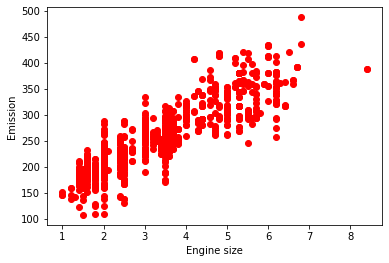

In [67]:
#To find whether the data is Linear or Non Linear

plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

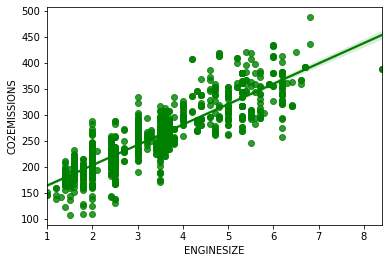

In [68]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df,color='green')

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

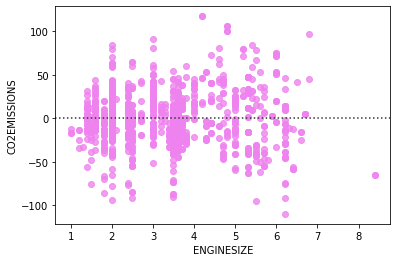

In [69]:
sns.residplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df,color='violet')

In [7]:
#Simple Linear Regression

lm=LinearRegression()

x=df[['ENGINESIZE']]
y=df[['CO2EMISSIONS']]

lm.fit(x,y)

z=lm.predict(x)

emission=lm.intercept_+(lm.coef_)*2.0

emission

array([[203.55449907]])

In [13]:
#Find the accuracy

print(r2_score(y,z)*100,"%")

76.41458597854816 %


In [12]:
#Using Train Test Split Method and MUltiple Linear Regression

s=df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']]
y=df['CO2EMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(s, y, test_size=0.2)

lm = LinearRegression()
model = lm.fit(x_train, y_train)
predictions = lm.predict(x_test)

predictions


array([218.36557209, 250.03052704, 220.75865889, 191.20094949,
       272.64915142, 187.41050655, 181.34870639, 202.82541925,
       210.9273691 , 327.59066333, 193.86552867, 342.78124682,
       340.63015277, 189.44477058, 307.46519493, 244.33673166,
       314.31933724, 181.09326175, 182.80914323, 322.93974918,
       187.40125314, 169.87133875, 315.48305195, 192.36816216,
       187.40125314, 307.46519493, 260.47012719, 212.44744749,
       204.75631774, 369.84915542, 198.61392272, 204.64460747,
       226.42974238, 198.29883654, 350.97738018, 316.46286506,
       182.71838628, 304.69479112, 241.55714584, 297.90123956,
       276.68922474, 215.96898733, 201.85485956, 396.6079223 ,
       231.32421797, 197.20640448, 205.16223227, 209.39300153,
       250.62376973, 226.40199474, 259.43655819, 258.98453197,
       309.5290057 , 267.1427556 , 321.21563489, 196.37957915,
       255.9863598 , 212.84319992, 301.00667484, 288.59671606,
       208.9216312 , 217.1673154 , 182.18478513, 185.26

In [13]:
#Accuracy of the above model

print(model.score(x_test,y_test)*100,"%")

87.8251940981814 %
